In [0]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 2.7MB/s 


In [0]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from pyramid.arima import auto_arima
%matplotlib inline
register_matplotlib_converters()
steps = 10
window = 12

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [0]:
covid_count_df =  pd.read_csv('/Covid-19/covid_19_india.csv').fillna(0)
print(covid_count_df.shape)
covid_count_df.head()

(1025, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
def get_date(x):
    if x is not None and type(x) is not float:
        return datetime.strptime(x, '%d/%m/%y')

In [0]:
covid_count_df['date'] = pd.Series(covid_count_df.Date, index = covid_count_df.index)
covid_count_df.date = covid_count_df.Date.apply(lambda x: get_date(x))
del covid_count_df['Date']
del covid_count_df['Time']
del covid_count_df['Sno']
covid_count_df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date
0,Kerala,1,0,0,0,1,2020-01-30
1,Kerala,1,0,0,0,1,2020-01-31
2,Kerala,2,0,0,0,2,2020-02-01
3,Kerala,3,0,0,0,3,2020-02-02
4,Kerala,3,0,0,0,3,2020-02-03


In [0]:
date_list = covid_count_df['date'].drop_duplicates(keep='last').tolist()
state_list = covid_count_df['State/UnionTerritory'].drop_duplicates(keep='last').tolist()
print(len(date_list), len(state_list))

78 35


In [0]:
count = np.zeros((3,len(state_list), len(date_list)))

In [0]:
for i in range(len(state_list)):
  for j in range(len(date_list)):
    df = covid_count_df[covid_count_df['date'] == date_list[j]]
    df = df[df['State/UnionTerritory'] == state_list[i]]
    if not df.empty:
      count[0][i][j] = df['Confirmed'].tolist()[0]
      count[1][i][j] = df['Cured'].tolist()[0]
      count[2][i][j] = df['Deaths'].tolist()[0]

In [0]:
india_df = pd.DataFrame({state_list[0]: count[0][0][:], state_list[1]: count[0][1][:], state_list[2]: count[0][2][:], 
                         state_list[3]: count[0][3][:], state_list[4]: count[0][4][:], state_list[5]: count[0][5][:],
                         state_list[6]: count[0][6][:], state_list[7]: count[0][7][:], state_list[8]: count[0][8][:],
                         state_list[9]: count[0][9][:], state_list[10]: count[0][10][:], state_list[11]: count[0][11][:],
                         state_list[12]: count[0][12][:], state_list[13]: count[0][13][:], state_list[14]: count[0][14][:],
                         state_list[15]: count[0][15][:], state_list[16]: count[0][16][:], state_list[17]: count[0][17][:],
                         state_list[18]: count[0][18][:], state_list[19]: count[0][19][:], state_list[20]: count[0][20][:],
                         state_list[21]: count[0][21][:], state_list[22]: count[0][22][:], state_list[23]: count[0][23][:],
                         state_list[24]: count[0][24][:], state_list[25]: count[0][25][:], state_list[26]: count[0][26][:],
                         state_list[27]: count[0][27][:], state_list[28]: count[0][28][:], state_list[29]: count[0][19][:],
                         state_list[30]: count[0][30][:], state_list[31]: count[0][31][:], state_list[32]: count[0][32][:],
                         state_list[33]: count[0][33][:], state_list[34]: count[0][34][:],}, index=date_list)
del india_df['Unassigned']
del india_df['Nagaland']
india_df['Total'] = india_df['Andaman and Nicobar Islands'] + india_df['Andhra Pradesh'] + india_df['Assam'] + india_df['Bihar'] + india_df['Chandigarh'] + india_df['Chhattisgarh'] +  india_df['Delhi'] + india_df['Goa'] + india_df['Gujarat'] + india_df['Haryana'] + india_df['Himachal Pradesh'] + india_df['Jammu and Kashmir'] + india_df['Jharkhand'] + india_df['Karnataka'] + india_df['Kerala'] + india_df['Ladakh'] + india_df['West Bengal'] + india_df['Arunachal Pradesh'] + india_df['Madhya Pradesh'] + india_df['Maharashtra'] + india_df['Manipur'] + india_df['Meghalaya'] + india_df['Mizoram'] + india_df['Nagaland#'] + india_df['Odisha'] + india_df['Puducherry'] + india_df['Punjab'] + india_df['Rajasthan'] + india_df['Tamil Nadu'] + india_df['Telengana'] + india_df['Tripura'] + india_df['Uttarakhand'] + india_df['Uttar Pradesh']                                     
india_df.head()

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Ladakh,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland#,Odisha,Puducherry,Punjab,Rajasthan,Tamil Nadu,Telengana,Tripura,Uttarakhand,Uttar Pradesh,West Bengal,Total
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


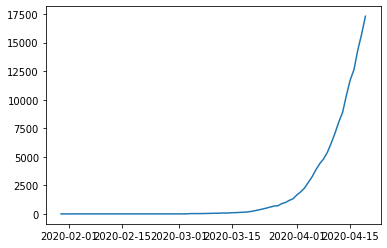

In [0]:
india = india_df['Total'].tolist()
date = india_df.index.tolist()
date.append(datetime(2020,4,17))
date.append(datetime(2020,4,18))
date.append(datetime(2020,4,19))
india.append(14352)
india.append(15722)
india.append(17304)
#print(india)
india_log = np.log(india)
india_df1 = pd.DataFrame({'Confirmed cases':india,},index=date)
plt.plot(india_df1)

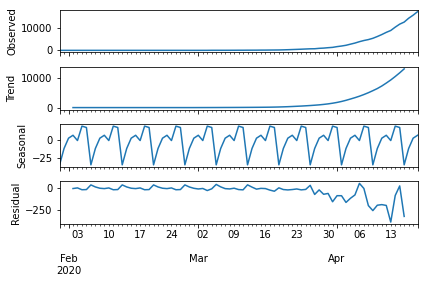

In [0]:
decomposition = seasonal_decompose(india_df1, model='additive') 
fig = decomposition.plot()
plt.show()

In [0]:
model = auto_arima(india_df1, trace=True, error_action='ignore', suppress_warnings=True)
results = model.fit(india_df1)

Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=974.395, BIC=988.612, Fit time=0.377 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=1014.314, BIC=1019.052, Fit time=0.010 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=991.400, BIC=998.508, Fit time=0.051 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=991.479, BIC=998.588, Fit time=0.091 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=975.896, BIC=987.743, Fit time=0.251 seconds
Fit ARIMA: order=(3, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=969.642, BIC=986.228, Fit time=0.371 seconds
Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=967.922, BIC=982.139, Fit time=0.304 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=982.989, BIC=992.466, Fit time=0.069 seconds
Fit ARIMA: order=(4, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=966.762, BIC=985.717, Fit time=0.461 seconds
Fit ARIMA: order=(5, 2, 2) seasonal_order=(0, 0, 0, 1

In [0]:
forecast = np.asarray(model.predict(n_periods=steps),dtype=np.int)
delta = timedelta(days=1)
dates = []
Date = date[len(date)-1]
for i in range(steps):
  Date += delta
  dates.append(Date)

In [0]:
date[len(date)-1]

datetime.datetime(2020, 4, 19, 0, 0)

In [0]:
forecast_df = pd.DataFrame({"Confirmed": forecast,}, index=dates)
forecast_df.head(10)

,Confirmed
2020-04-20,18979
2020-04-21,20406
2020-04-22,22435
2020-04-23,24072
2020-04-24,25823
2020-04-25,27879
2020-04-26,29602
2020-04-27,31728
2020-04-28,33651
2020-04-29,35614


In [0]:
forecast_df.head(10)

,Confirmed
2020-04-20,18979
2020-04-21,20406
2020-04-22,22435
2020-04-23,24072
2020-04-24,25823
2020-04-25,27879
2020-04-26,29602
2020-04-27,31728
2020-04-28,33651
2020-04-29,35614


Covid-19 Tests carried out


In [0]:
test_df = pd.read_csv('/Covid-19/StatewiseTestingDetails.csv')
test_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-02-17,Kerala,423,406.0,3
1,2020-02-18,Kerala,425,420.0,3
2,2020-02-19,Kerala,432,423.0,3
3,2020-02-20,Kerala,433,423.0,3
4,2020-02-21,Kerala,437,426.0,3


In [0]:
def get_date(x):
    if x is not None and type(x) is not float:
        return datetime.strptime(x, '%Y-%m-%d')

In [0]:
test_df['date'] = pd.Series(test_df.Date, index = test_df.index)
test_df.date = test_df.Date.apply(lambda x: get_date(x))
del test_df['Date']
test_df.head()

,State,TotalSamples,Negative,Positive,date
0,Kerala,423,406.0,3,2020-02-17
1,Kerala,425,420.0,3,2020-02-18
2,Kerala,432,423.0,3,2020-02-19
3,Kerala,433,423.0,3,2020-02-20
4,Kerala,437,426.0,3,2020-02-21


In [0]:
dates = test_df['date'].drop_duplicates(keep='last').tolist()
Tests = []
Date_test = []
for date in dates:
  df = test_df[test_df['date'] <= date]
  total_test = df['TotalSamples'].sum()
  Tests.append(total_test)
  Date_test.append(date)

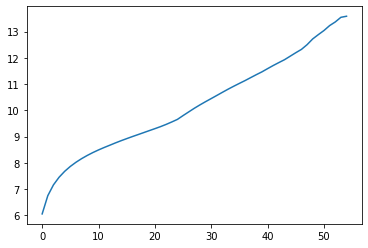

In [0]:
log = np.log(Tests)
plt.plot(log)

In [0]:
model = auto_arima(log, trace=True, error_action='ignore', suppress_warnings=True)
results = model.fit(log)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-169.855, BIC=-157.921, Fit time=0.339 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-95.944, BIC=-91.966, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-159.270, BIC=-153.303, Fit time=0.193 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-128.470, BIC=-122.503, Fit time=0.103 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-166.846, BIC=-156.901, Fit time=0.452 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-167.650, BIC=-153.727, Fit time=0.363 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-160.750, BIC=-150.805, Fit time=0.305 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-166.184, BIC=-152.261, Fit time=0.354 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-164.381, BIC=-156.425, Fit time=0.283 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_ord

In [0]:
forecast = np.asarray(np.exp(model.predict(n_periods=steps)),dtype=np.int)
delta = timedelta(days=1)
dates = []
date = Date_test[len(Date_test)-1]
for i in range(steps):
  date += delta
  dates.append(date)

In [0]:
Date_test[len(Date_test)-1]

Timestamp('2020-04-11 00:00:00')

In [0]:
forecast_df =  pd.DataFrame({"Tests": forecast,}, index=dates)
forecast_df.head(10)

,Tests
2020-04-12,783592
2020-04-13,713302
2020-04-14,611764
2020-04-15,501681
2020-04-16,398022
2020-04-17,308377
2020-04-18,235061
2020-04-19,177322
2020-04-20,133004
2020-04-21,99562
